## Real Estate Agency


* Student name:

- Beatrice Kariuki   - Lead

- Rodgers Odhiambo

- Mohamed Ali

- Ahmed HAJI

- Peter Muhia

- Emmanuellar Karisa

* Student pace:  part time 
* Instructor name: Sam Jane



![awesome](https://images.unsplash.com/photo-1560518883-ce09059eeffa?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8aG91c2UlMjByZW50YWx8ZW58MHx8MHx8fDA%3D)

## 1.0 BUSINESS UNDESTARNDING

# 1.1 Overview
The primary goal of the project is to build a predictive model that can estimate/predict the house prices in King County, Washington ,USA based on its features,provide valuable insights through comparative market analysis in order to facilitate informed decision making. The target audience includes real estate analysts,real estate investors,data scientists,machine learning practioners,financial institutions,potential home buyers and potential tenants. The dataset used is the King County House dataset accessible from 
(https://drive.google.com/file/d/1qeLCHwL6FCu2MFMEpMg8CzuVOb_kx2Kq/view?usp=drive_link)

## 1.2 PROBLEM STATEMENT
The real estate industry is constantly changing due to social, economic, and technological developments. As such, new challenges are presented each day. It is important to stay informed of these changes,create strategies that address the current issues and also have an understanding of the core principles that drive successful sales.A solid pricing strategy backed up by data and market knowledge are among the most important factors to take into consideration.Some of the challenges in the industry include;

1.Runaway inflation, high interest rates, bank stress and tightening liquidity. This, compounded by fluctuating demand as a
result of inflation income effect that is constraining consumer purchasing power, is having a negative toll on investment earnings in the area.

2.The ever increasing competition which makes standing out and capturing the attention of potential leads can be a challenging endeavor. Leads can be elusive, as many people are cautious about sharing their contact information or engaging with real estate agents.

3.Pricing Properties - Setting the right price for a property from the beginning can determine whether it sells quickly and profitably or sits unsold for an extended period.This highlights the crucial importance of precise property pricing in the real estate sector.

4.Demographics - Change in demographics can have a significant impact on the real estate industry. Shifting population characteristics, such as age, income, and household composition, influence the types of properties in demand, preferred locations, and overall market trends e.g an aging population might lead to increased demand for retirement communities or homes with accessibility features.

The key stakeholders who play a vital role in the real estate industry are ;

- Real estate analysts - Help in providing valuable insights and analysis to support decision-making processes.
- Real estate investors - Individuals or institutions who invest in real estate for the purpose of generating income.
- Real estate agents - facilitate property transactions between buyers and sellers.
- Financial institutions - b.anks,morgage companies.
- Potential home buyers and potential tenants - indivuduals/companies looking to buy or sell their properties.
- Government - Regulates the real estate industry through zoning laws, building standards and other regulations.
- Real Estate Appriasers - Determine the value of a property based on various factors,helping buyers and lenders assess its worth.

# 1.3 OBJECTIVES
- To evaluate factors that affect saleprice of houses.
- What combinations of features is best fit for price predictions.


# 1.4 Data Understanding
For this project, we will be using the King County House Sales dataset, which contains information about house sales in a northwestern county. The dataset includes various features such as the number of bedrooms, bathrooms, living area size, condition of the house, presence of additional amenities, and more.

The dataset has 20 columns and over 21500 records, covering house sales between May 2014 and May 2015. The data is suitable for the project because it provide relevant information about the features that affect the house prices in King County. The dataset was obtained from GitHub.

The King County House Sales dataset contains the following columns;

- Price - Sale price (prediction target),
- bedrooms - Number of bedrooms,
- bathrooms - Number of bathrooms,
- sqft_living - Square footage of living space in the home,
- sqft_lot - Square footage of the lot,
- floors - Number of floors (levels) in house,
- view - Quality of view from house,
- condition - How good the overall condition of the house is. Related to maintenance of house,
- grade - Overall grade of the house. Related to the construction and design of the house,
- sqft_above - Square footage of house apart from basement,
- sqft_basement - Square footage of the basement,
- yr_built - Year when house was built,
- yr_renovated - Year when house was renovated,
- zipcode - ZIP Code used by the United States Postal Service,
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and
- sell_yr - Date house was sold.

For our analysis we decided to choose the following columns price,bedrooms,bathrooms,sqft_living	condition,yr_built,sell_yr and house_age of which are expected to have an impact on the price of the house.

# 1.5 Data familiarization

In [1]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [2]:
#Loading data
house_df=pd.read_csv('kc_house_data.csv')
pd.set_option("display.max_columns",None)
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking null values
house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
#checking on data information
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#statistical summary
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Statistical summary observation
- count for each column is 21597  this shows that we dont have missing values
- The mean value of the house price is USD 540297  while the minimum house price is USD 78000 and maximum  house price is USD 7700000
- The standard deviation of the house price stands at USD 367368.

## 1.6 DATA PREPARATION

In [6]:
#we'll focus on the columns mentioned above and drop the rest
house_df.drop(columns=['id','lat','long','sqft_lot','floors','waterfront','view','zipcode','sqft_living15','sqft_lot15','grade','yr_renovated','sqft_above','sqft_basement'],inplace=True)
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built
0,10/13/2014,221900.0,3,1.00,1180,Average,1955
1,12/9/2014,538000.0,3,2.25,2570,Average,1951
2,2/25/2015,180000.0,2,1.00,770,Average,1933
3,12/9/2014,604000.0,4,3.00,1960,Very Good,1965
4,2/18/2015,510000.0,3,2.00,1680,Average,1987


In [7]:
#checking for for null values
house_df.isna().sum()

date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
condition      0
yr_built       0
dtype: int64

## 1.7 Feature engineering 
- we'll convert date to datetime format, extract the year from date column then create a new column for sell year. 
- The goal is to get the age of the house as shown below

- we'll also deal with the categorical column in our dataset. 
- The context and order of our categorical column shows a meaningful order 
- as it can capture the notion that higher numerical value represents better condition 
-meaning the assumption of ordinality is reasonable for our dataset therefore our linear regression model might benefit from the following encoding.

In [8]:
#converting date to datetime format
house_df['date']=pd.to_datetime(house_df['date'])
#extracting year from date column
house_df.date=house_df['date'].dt.year

# Creating a new column for sell year
house_df['sell_yr'] = pd.to_datetime(house_df['date'],format='%Y').dt.year
house_df.drop(columns='date', inplace=True)

In [9]:
#creating column house age at year of sale
house_df['house_age']=house_df['sell_yr']-house_df['yr_built']


In [10]:
#transformation of categorical values 'condition' column
house_df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [11]:
# Explicitly converting the 'sell_yr' column to int64
house_df['sell_yr'] = house_df['sell_yr'].astype('int64')

In [12]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   condition    21597 non-null  int64  
 5   yr_built     21597 non-null  int64  
 6   sell_yr      21597 non-null  int64  
 7   house_age    21597 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.3 MB


#### Dealing with the outliers

In [13]:
#Dealing with the outliers

#Loading the dataset

df = house_df

# choosing a threshold of 3 for the z-score
z_score_threshold = 3  

# Calculating the z-scores for each data point
z_scores = np.abs(stats.zscore(df))

# Identify outliers based on the threshold
outliers = np.where(z_scores > z_score_threshold)

#Printing the indices of the outliers
print("Indices of outliers:")
print(outliers)

# Removing the outliers from our dataset
cleaned_house_df = df[(z_scores < z_score_threshold).all(axis=1)].copy()
cleaned_house_df

Indices of outliers:
(array([    5,     5,    21,    36,   153,   153,   246,   269,   269,
         270,   270,   282,   300,   300,   312,   380,   397,   419,
         436,   450,   484,   486,   518,   527,   527,   540,   540,
         556,   556,   577,   656,   779,   779,   814,   814,  1030,
        1054,  1054,  1099,  1099,  1121,  1134,  1150,  1159,  1161,
        1162,  1162,  1162,  1215,  1239,  1245,  1259,  1270,  1280,
        1292,  1313,  1313,  1313,  1359,  1394,  1418,  1431,  1434,
        1440,  1446,  1446,  1446,  1537,  1620,  1658,  1658,  1674,
        1728,  1730,  1732,  1768,  1805,  1846,  1846,  1919,  1919,
        1942,  1943,  2038,  2038,  2083,  2083,  2086,  2111,  2123,
        2134,  2138,  2177,  2198,  2221,  2234,  2234,  2234,  2265,
        2265,  2318,  2343,  2381,  2397,  2442,  2442,  2459,  2459,
        2459,  2471,  2563,  2576,  2618,  2618,  2624,  2624,  2624,
        2666,  2666,  2711,  2843,  2856,  2856,  2862,  2862,  2897

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,sell_yr,house_age
0,221900.0,3,1.00,1180,3,1955,2014,59
1,538000.0,3,2.25,2570,3,1951,2014,63
2,180000.0,2,1.00,770,3,1933,2015,82
3,604000.0,4,3.00,1960,5,1965,2014,49
4,510000.0,3,2.00,1680,3,1987,2015,28
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3,2009,2014,5
21593,400000.0,4,2.50,2310,3,2014,2015,1
21594,402101.0,2,0.75,1020,3,2009,2014,5
21595,400000.0,3,2.50,1600,3,2004,2015,11


# 2.0 EXPLANATORY DATA ANALYSIS
In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends using univariate,bivariate and multivariate analysis

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.



# Univariate Analysis
- Univariate analysis involves the examination of single variables.We focus in the summary statistics of target variable-price to help us undersatand the distribution and skewness of house prices

Basic Statistics of Price:
 count    2.092500e+04
mean     5.018273e+05
std      2.527614e+05
min      8.000000e+04
25%      3.199000e+05
50%      4.450000e+05
75%      6.248000e+05
max      1.640000e+06
Name: price, dtype: float64


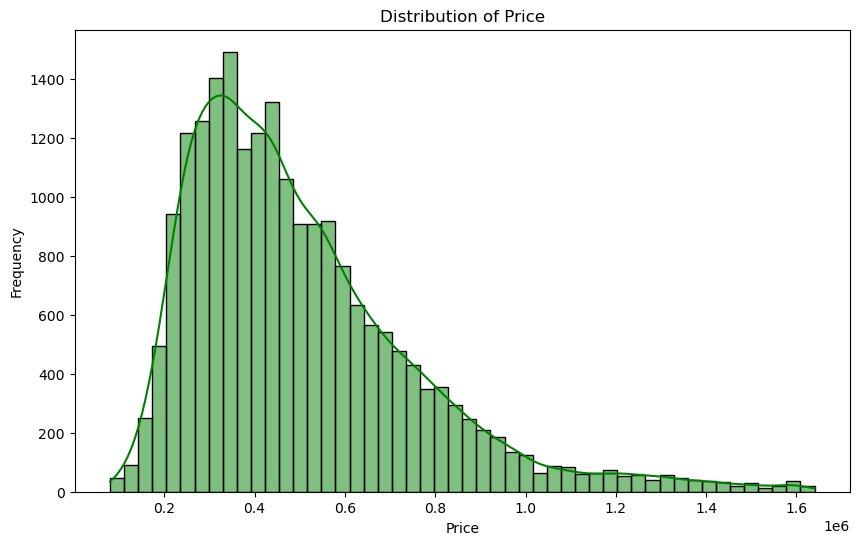

In [14]:
# Display summary statistics of the 'price' variable
price_stats = cleaned_house_df['price'].describe()
print("Basic Statistics of Price:\n", price_stats)

# Visualizing the distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_house_df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



- The histogram shows that the distribution of house price is positively skewed suggesting that while most houses are concentrated around lower to mid-range prices, there are some properties with significantly higher prices.

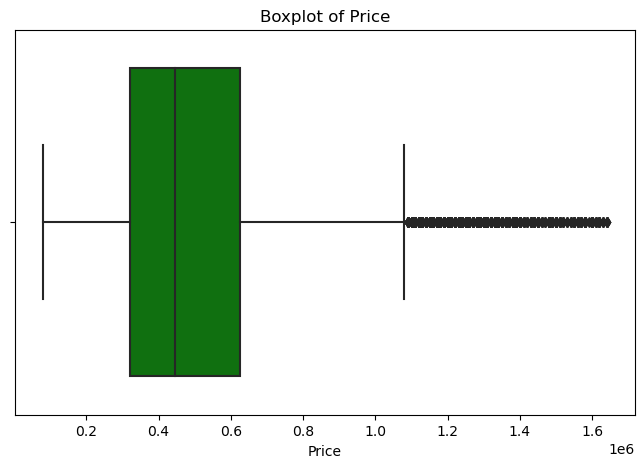

In [15]:
# Visualize the boxplot of 'price' to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=cleaned_house_df['price'], color='green')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

- The box plot confirms the pice is  positively skewed as indicated by longer right tail the points beyond whiskers suggests the existence of potential outliers
- The median line closer to the lower edge of the box is consintent with positively skewed distribution showing that majority of prices are concentrated towards the lower end with fewer houses having higher prices

# Bivariate Analysis

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

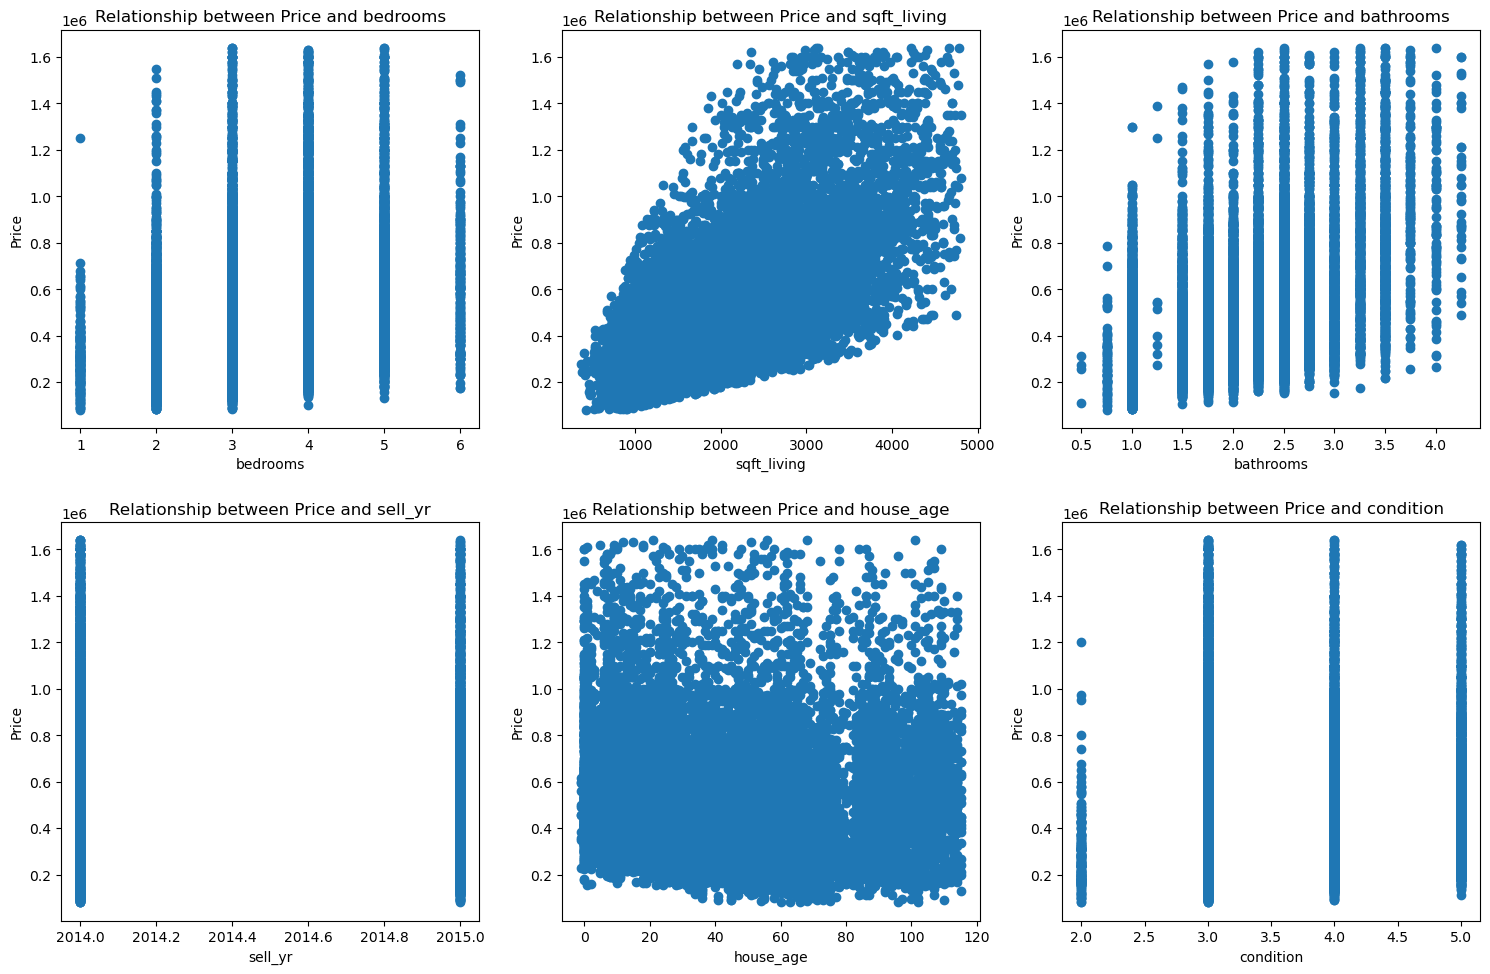

In [16]:
#relationships between our target variable and other independent variables in the dataset
variables = ['bedrooms','sqft_living','bathrooms','sell_yr','house_age','condition']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(cleaned_house_df[var],cleaned_house_df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

- The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive

# Multivariate

In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

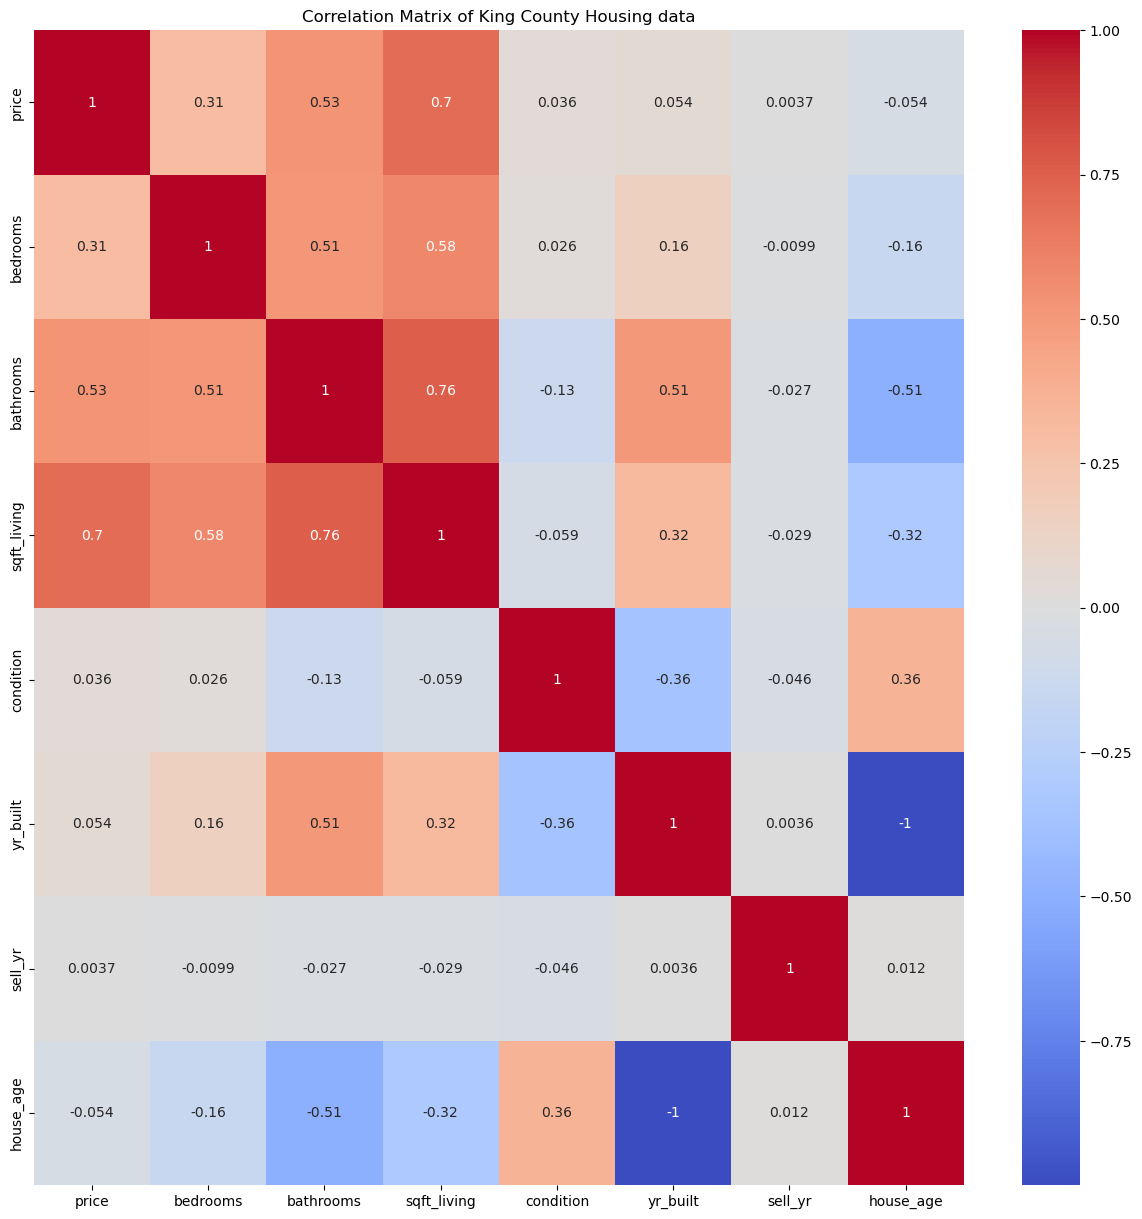

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of King County Housing data')
plt.show()

- Positive correlations are typically represented by shades of red, and negative correlations by shades of blue.
- We note that bathrooms and sqft_living are highly positively correlated.


# 3.0 Modeling

In this section, we will build and evaluate both simple linear and multiple linear statistical models for the house price using the features we have selected and prepared in the previous sections. We will use linear regression to fit the models and compare their performance.We will evaluate to see whether our model is statistically significant.We will also use metrics such as mean absolute error (MAE), root mean squared error (RMSE),R-squared (R2) and Adj R-squared to measure the accuracy and goodness of fit of the models.

Our linear regression model is based on the following assumptions
- Linearity: The relationship between the independent variables and the dependent variable is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.

## Simple linear regression

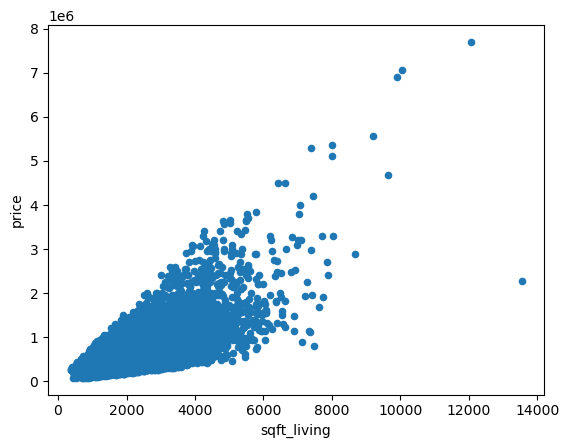

In [18]:
#Relationship between our target variable 'price' and 'sqft_living'
house_df.plot.scatter(x='sqft_living',y='price');

- The graph depicts a linear relationship with the positive gradient.

### Baseline model

In [19]:
import statsmodels.api as sm
y = house_df["price"]
X_baseline = house_df[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        05:55:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [20]:
baseline_results.params

const         -43988.892194
sqft_living      280.863014
dtype: float64

### Evaluating and interpreting the results
- The R-squared of 0.493 indicates that sqft_living explains 49.3% of the variation in  price. 


- The coefficient estimates show the relationship between the independent variable (sqft_living) and the dependent variable (price).The constant coefficient  is -43988.892194 representing the estimated price when sqft-living is zero.The coefficient of sqft_living shows that a unit increase in sqft_living is associated with an increase in price by approximately 280.863014.  


- The p-values (P>|t|) associated with the coefficients determine their statistical significance. In this case, both the const and sqft_living coefficients have p-values of 0.000, indicating that the linear relationship is statistically significant.


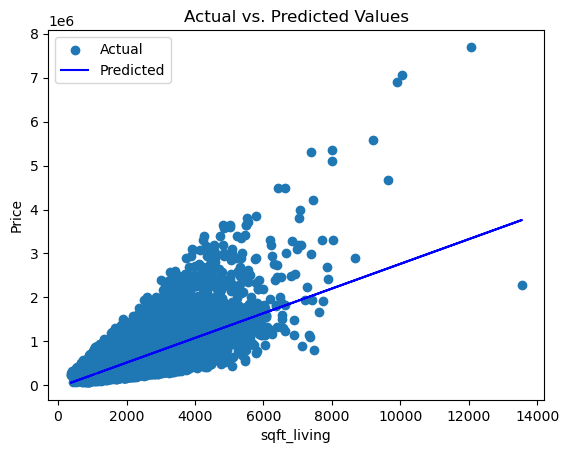

In [21]:
#Visualizaton
#fit the simple linear regression model
y = house_df["price"]
X_baseline = house_df["sqft_living"]

# Addinding a constant term to the independent variable matrix
X_baseline = sm.add_constant(X_baseline)

# Creating and fitting the baseline model
baseline_model = sm.OLS(y, X_baseline)
baseline_results = baseline_model.fit()

# Visualize the linearity
plt.scatter(X_baseline['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(X_baseline['sqft_living'], baseline_results.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

 ###### ploting_fit version of model fit

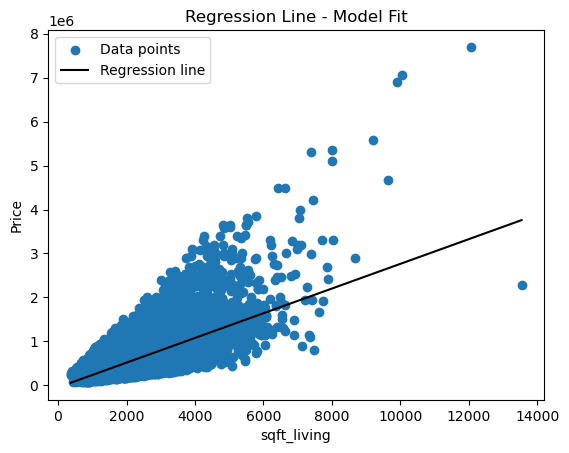

In [22]:
#visualizing the regression line to show model fit
#Scatter plot of data points
plt.scatter(house_df["sqft_living"], house_df["price"], label="Data points")

# Regression line
x = np.linspace(house_df["sqft_living"].min(), house_df["sqft_living"].max(), 100)
y = baseline_results.params[0] + baseline_results.params[1] * x
plt.plot(x, y, color="black", label="Regression line")

plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Regression Line - Model Fit")
plt.legend()
plt.show()

The plot helps to assess the linearity of the relationship between the house price and the square footage of living space.the model shows how well linear regression model fits the data.

##### Ploting the model residuals

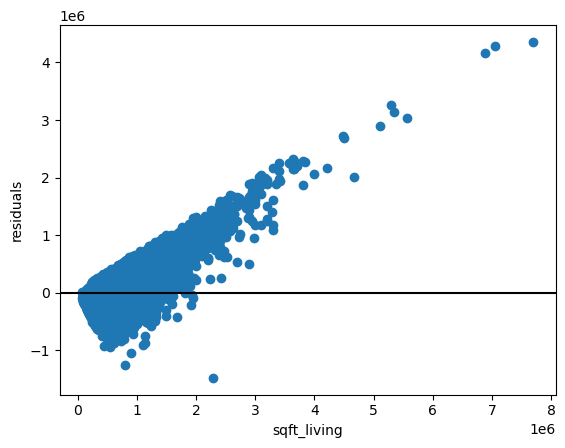

In [23]:
#checking for homoscedasticity 
#residuals for predicted values, 
fig, ax = plt.subplots()

ax.scatter(house_df["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals"); 

In [24]:
#Our scatter plot shows a clear pattern where where most of our data points are consistently above the line y = 0 than below,
# this pattern extends across a significant protion of the data which suggests presence of heteroscedasticity, 
#this posses a problem because it violates the assumption of constant variance of residuals in our baseline linear model

In [25]:
# To overcome the problem stated above we'll diagnose heteroscedasticity by applying log transformation to our price column,
#we'll then refit the model with log-transformed dependent variable in this case the price column, 
#we'll then check for heteroscedasticity through visualization# Apply log transformation to 'price'

cleaned_house_df['log_price'] = np.log(cleaned_house_df['price'])

# Refiting the model with the log-transformed dependent variable
X_log = sm.add_constant(cleaned_house_df['sqft_living'])
y_log = cleaned_house_df['log_price']

model_log = sm.OLS(y_log, X_log).fit()


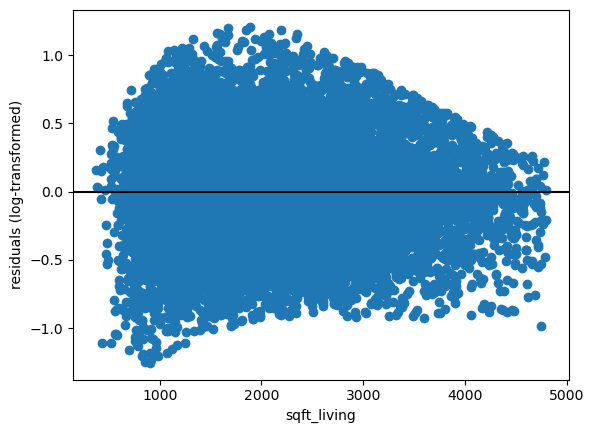

In [26]:
# Ploting residuals against predicted values after log transformation
fig, ax = plt.subplots()

ax.scatter(cleaned_house_df['sqft_living'], model_log.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals (log-transformed)")
plt.show()


In [27]:
#This looks much better
#Going forward with our analysis we'll be using the model_log i.e log_price to make predictions as well as interpreting the results.

In [28]:
#In the next step we'll create a new column to store the log-transformed value i.e log_price 
cleaned_house_df['log_price'] = np.log(cleaned_house_df['price'])


#Now,our DataFrame cleaned_house_df has a new column named log_price containing the log-transformed values of the 'price' variable. 
#we'll be using this column as our dependent variable in our subsequent analysis.


### Multiple Linear regression
Here we use multiple linear regression to predict house price from more than one feature. Multiple linear regression models the linear relationship between a dependent variable and two or more independent variables

###### Checking for multicollinearity among the features

In [29]:
corr = house_df.corr().abs()

Multicollinear_Features = []
Multicollinear_Corr = []

# Function to check multicollinearity for a given feature
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].items():
        if correlation >= 0.75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)

# Iterate over features in the correlation matrix
for feature in corr.columns:
    check_multicollinearity(feature)

# Creating a DataFrame with multicollinearity information
MC_df = pd.DataFrame({'Correlations': Multicollinear_Corr, 'Features': Multicollinear_Features})
MC_df = MC_df.sort_values(by='Correlations', ascending=False)


print(MC_df)

   Correlations                  Features
2      0.999873     [yr_built, house_age]
3      0.999873     [house_age, yr_built]
0      0.755758  [bathrooms, sqft_living]
1      0.755758  [sqft_living, bathrooms]


#### Building a Multiple Linear Regression Model


#### Model 1

In [30]:
# defining dependent and independent variables
y = cleaned_house_df['log_price']
X = cleaned_house_df[['bathrooms','sqft_living','house_age','condition']]

In [31]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,bathrooms,sqft_living,house_age,condition
0,1.0,1.00,1180,59,3
1,1.0,2.25,2570,63,3
2,1.0,1.00,770,82,3
3,1.0,3.00,1960,49,5
4,1.0,2.00,1680,28,3


In [32]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [33]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     3473.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        05:55:20   Log-Likelihood:                -6331.7
No. Observations:               16740   AIC:                         1.267e+04
Df Residuals:                   16735   BIC:                         1.271e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.8221      0.019    635.847      

In [34]:
# Making predictions on the test data
predictions = model.predict(X_test)
predictions[:4]

4363     13.081428
9995     12.529140
11986    13.812433
15491    13.022106
dtype: float64

In [35]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 0
RMSE: 0.4


- For this specific MAE value, it means that our model is off by about 0 USD in a given price prediction.
- For this specific RMSE value, it means that our model is off by about 0.4 USD in a given  price prediction.

#### Model 2

In [36]:
# defining dependent and independent variables
y = cleaned_house_df['log_price']
X = cleaned_house_df[['bedrooms','sqft_living','bathrooms','house_age','condition']]

In [37]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,bedrooms,sqft_living,bathrooms,house_age,condition
0,1.0,3,1180,1.00,59,3
1,1.0,3,2570,2.25,63,3
2,1.0,2,770,1.00,82,3
3,1.0,4,1960,3.00,49,5
4,1.0,3,1680,2.00,28,3


In [38]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [39]:
#Multilinear regression
model_2 = sm.OLS(y_train, X_train).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     2913.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        05:55:20   Log-Likelihood:                -6150.1
No. Observations:               16740   AIC:                         1.231e+04
Df Residuals:                   16734   BIC:                         1.236e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.9325      0.019    619.088      

In [40]:
# Making predictions on the test data
predictions = model_2.predict(X_test)
predictions[:4]

4363     13.036239
9995     12.570330
11986    13.781051
15491    12.971705
dtype: float64

In [41]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 0
RMSE: 0.3


- For this specific MAE value, it means that our model is off by about 0 USD in a given price prediction*.
- For this specific RMSE value, it means that our model is off by about 0.3 USD in a given  price prediction*.

In [42]:
#Recursive feature selection
# Creating the RFE model 
n_features_to_select = 5 
rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the model with selected features
model_rfe = sm.OLS(y_train, sm.add_constant(X_train_rfe))
results_rfe = model_rfe.fit()
print(results_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     2913.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        05:55:20   Log-Likelihood:                -6150.1
No. Observations:               16740   AIC:                         1.231e+04
Df Residuals:                   16734   BIC:                         1.236e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9325      0.019    619.088      0.0

####  We choose model 2 because

- Higher R-squared value: Model 2 has the highest R-squared value of 46.5%, indicating that it explains a larger proportion of the variance in the dependent variable compared to the other  model.

#### Evaluating the model

 Evaluating our model to fit the assumptions of linear regression

In [43]:
#log transforming sqft_living
cleaned_house_df['sqft_living'] = np.log(cleaned_house_df['sqft_living'])

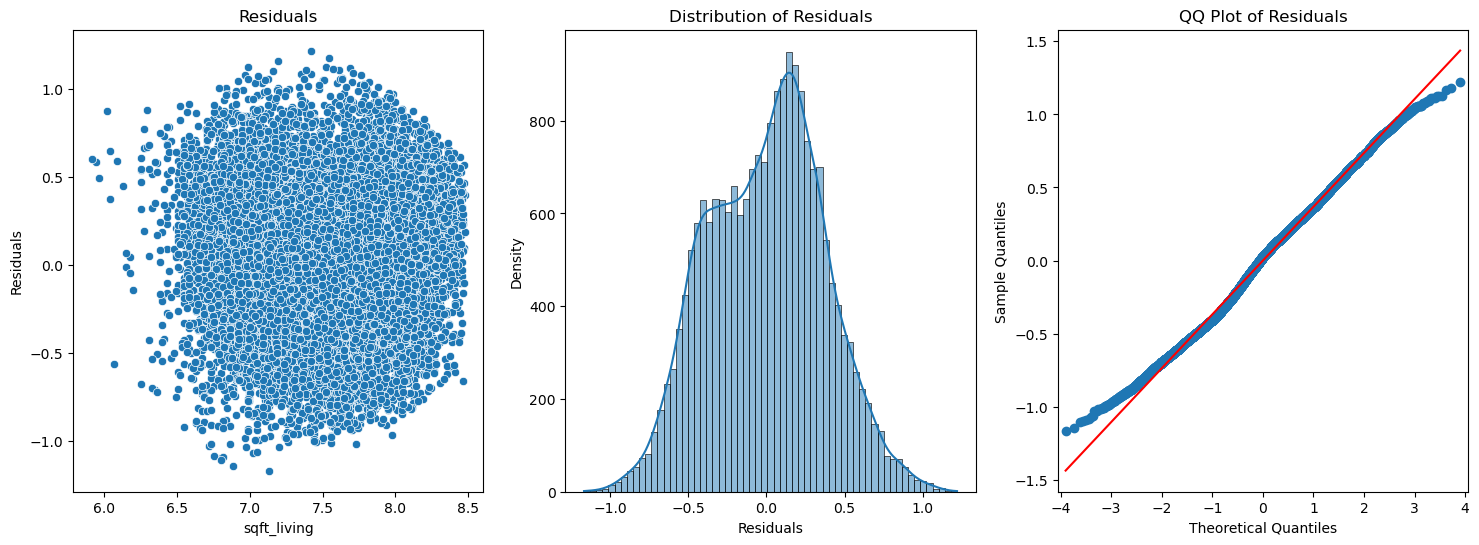

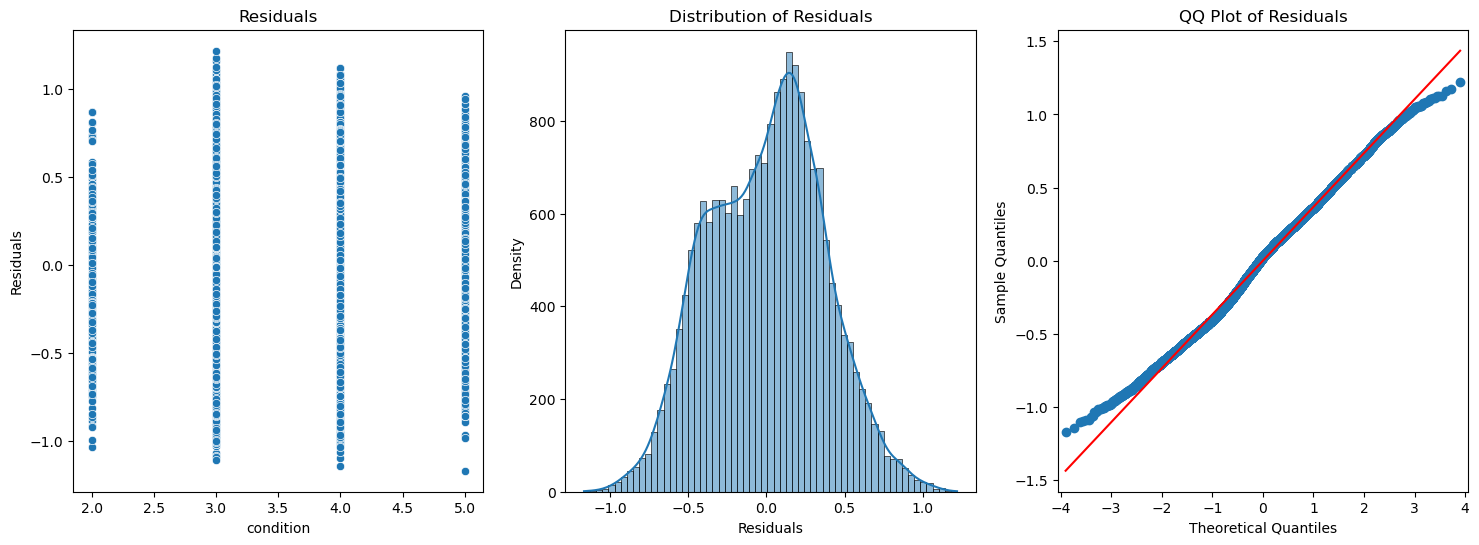

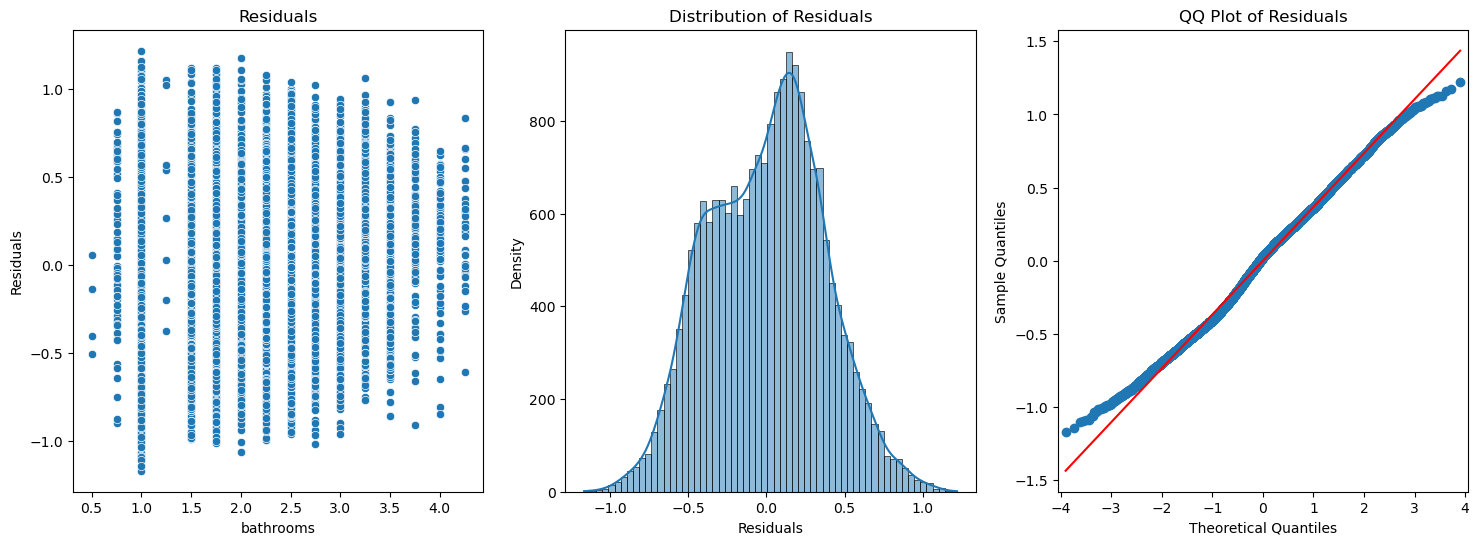

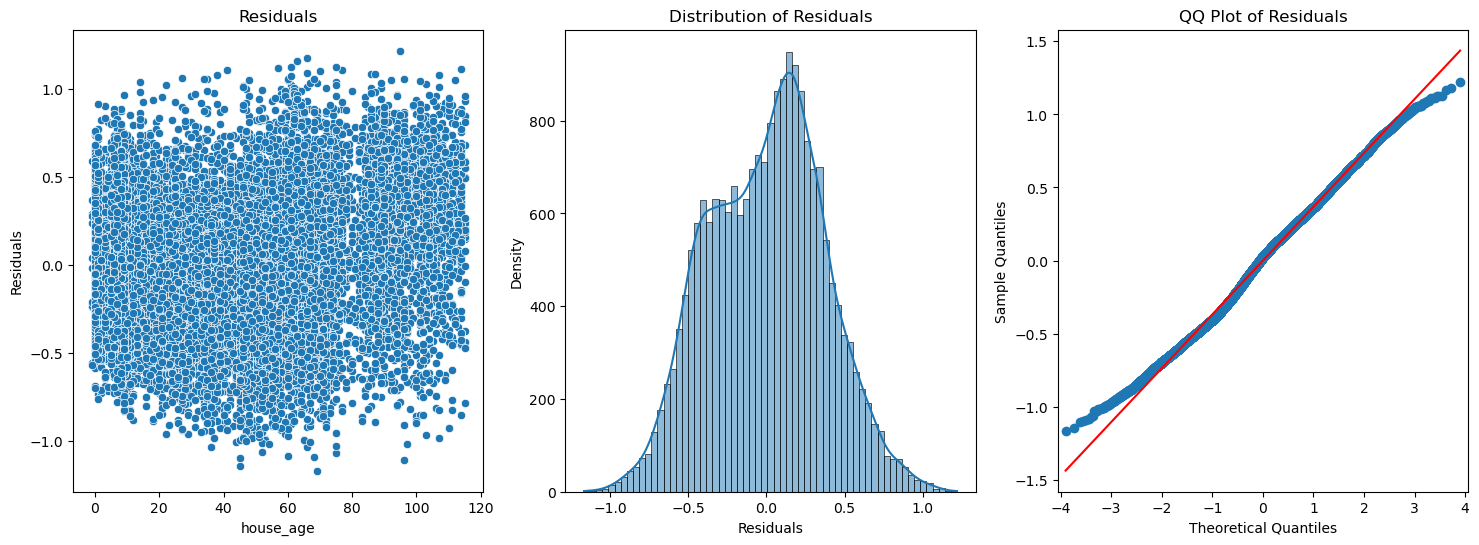

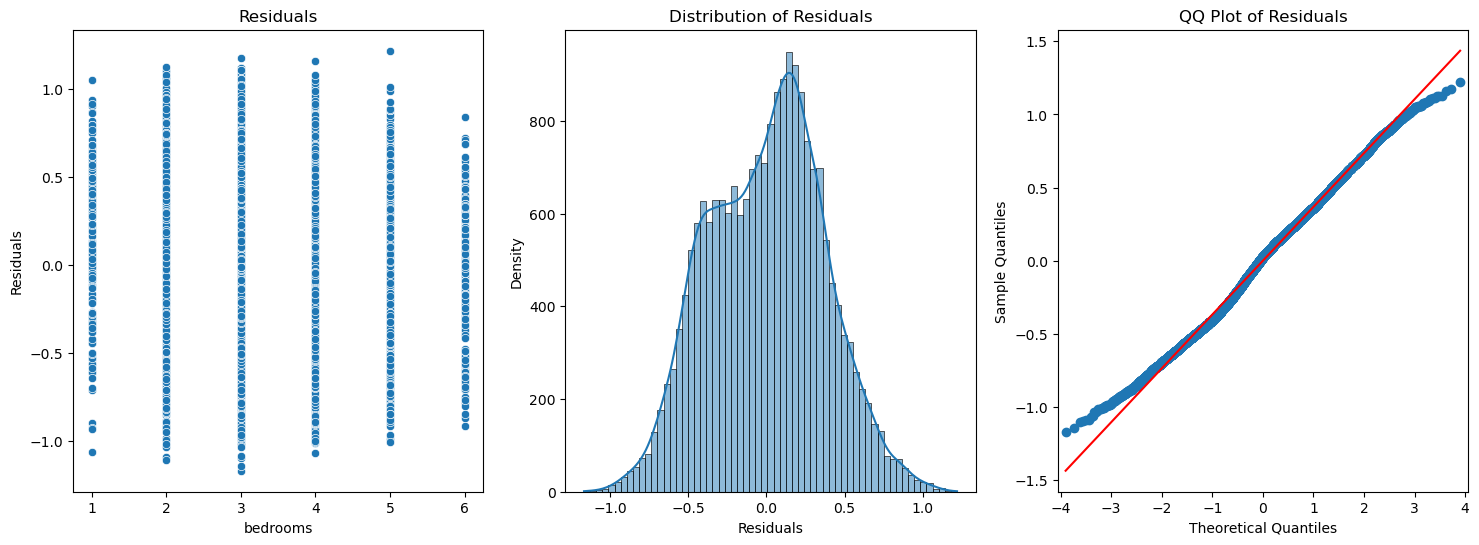

In [44]:
# Perform model diagnostics for our independent variables
def model_diagnostic(model, x, x_name, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.scatterplot(x=x, y=model.resid, ax=axes[0])
    axes[0].set_xlabel(x_name)
    axes[0].set_ylabel('Residuals')
    axes[0].set_title('Residuals')
    sns.histplot(model.resid, kde=True, ax=axes[1])
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Density')
    axes[1].set_title('Distribution of Residuals')
    sm.qqplot(model.resid, line='r', ax=axes[2])
    axes[2].set_xlabel('Theoretical Quantiles')
    axes[2].set_ylabel('Sample Quantiles')
    axes[2].set_title('QQ Plot of Residuals')
    plt.show()
model_2 = sm.OLS(cleaned_house_df['log_price'], sm.add_constant(cleaned_house_df[['sqft_living', 'condition', 'bathrooms']])).fit()
model_diagnostic(model_2, cleaned_house_df['sqft_living'], 'sqft_living', cleaned_house_df['log_price'])
model_diagnostic(model_2, cleaned_house_df['condition'], 'condition', cleaned_house_df['log_price'])
model_diagnostic(model_2, cleaned_house_df['bathrooms'], 'bathrooms', cleaned_house_df['log_price'])
model_diagnostic(model_2, cleaned_house_df['house_age'], 'house_age', cleaned_house_df['log_price'])
model_diagnostic(model_2, cleaned_house_df['bedrooms'], 'bedrooms', cleaned_house_df['log_price'])

- Residual plot  measures homoscedasticity
- Density plot measeures normality
- Line graph measures linearity
- The four independent variables 'sqft_living', 'condition', 'bathrooms' ,'house_age','bedrooms' pass the assumptions for regression that is normality, homoscedasticity and linearity.


In the United States, the classification of bathrooms involves different types. A "full" bathroom comprises a sink, toilet, and either a tub/shower combo or separate tub and shower. Meanwhile, a "three-quarters" bath includes a sink, toilet, and either a tub OR a shower, but not both. A "half-bath" has a sink and a toilet, commonly known as "powder rooms." Lastly, a "quarter-bath" consists only of a toilet and is less prevalent today, typically found in places like garages or workshops for practical reasons

#### Results for model 2

- Our model shows a Prob (F-statistic) of 0.000 which is lower than the standard alpha of 0.05.The results also shows that the p_value of all the coefficients is 0.00 suggesting that the model is statistically significant.

- R-squared is 0.465, indicating that approximately 46.5% of the variability in housing prices is explained by the model.


- The constant coefficientsuggest the baseline price is USD 11.9325 when all other predictors are zero.
- The bedrooms coefficient indicates that a unit increase in number of bedrooms   is associated with a decrease in price by USD 0.0765.
- The sqft_living coefficient suggest that a unit increase  in square footage is associated with an increase in price by  USD 0.0004
- The bathrooms coefficient suggest that a unit increase in number of bathrooms are associated with an increasee in prices USD 0.1572.
- The house_age coefficient suggest that a unit increase in house age is associated with an increase in prices by USD 0.0039. 
- The condition coefficient  indicates that a unit increase of  house condition is associated with an increase in prices by  USD 0.0166.

- The  model shows that with 95% confidence interval for the intercept is about  11.895 to about 11.970,our 95% confidence interval for the coefficient of bedrooms coefficient is about -0.084 to -0.069,our 95% confidence interval for the coefficient of sqft_living coefficient is about 0.000 and 0.000,our 95% confidence interval for the coefficient of bathrooms coefficient is about  0.145 to 0.170,our 95% confidence interval for the coefficient of house_age coefficient is about  0.145 to 0.170,our 95% confidence interval for the coefficient of condition coefficient is about  0.008 to 0.025.

Key Findings:

Square Footage Influence: The analysis indicates that square footage ("sqft_living") is a substantial predictor of home prices, suggesting larger homes tend to command higher values.

Additional Factors: In the multiple regression model, other factors such as the number of bathrooms, house age, and overall condition also play a role in predicting home prices, showcasing the multifaceted nature of property valuation.

### Recommendations

Emphasize Square Footage Expansion: Based on the models, expanding the square footage of your home can significantly boost its estimated value. Consider strategic renovations or additions to increase living space, aligning with market preferences.

Modernize Bathrooms: The number of bathrooms is also influential. Modernizing and upgrading bathrooms can enhance overall home appeal and potentially contribute to a higher estimated value.

Maintain and Upgrade Overall Condition: Improving the overall condition of your property is crucial. Regular maintenance and upgrades, such as fresh paint, landscaping, and fixing any structural issues, can positively impact home valuation.
Holistic Approach to Home Improvement:

Balanced Upgrades: While square footage is pivotal, balance your renovation efforts by considering other factors such as bathrooms, house age, and condition. A well-rounded approach to improvement can lead to a more appealing and valuable property.


Engage Real Estate Professionals: Consult with local real estate professionals or certified appraisers to gain insights specific to your area. They can provide a nuanced understanding of current market trends, buyer preferences, and valuation nuances that go beyond the scope of the models.

Appraisal for Accuracy: Invest in a professional appraisal for a precise and tailored assessment of your home's value. An appraiser can consider a range of factors that impact local property values and provide a more accurate estimate.
Acknowledge Model Limitations:

Understand Model Scope: Recognize that regression models have limitations and might not capture every factor influencing home prices. Individual cases can vary, and unique features of your property or local market conditions might not be fully represented.

Regular Reevaluation: Given the dynamic nature of real estate markets, periodically reassess the value of your property, especially after major renovations or changes in market conditions.


### Conclusion

By incorporating these refined recommendations, homeowners can adopt a more comprehensive and informed strategy for enhancing their home's value based on the provided regression models.


Improvement of house condition will increase the price by USD 0.0166

Model evaluation metrics, including R-squared, MAE, and RMSE, provided a quantitative assessment of predictive accuracy. Model 2, with an R-squared value of 46.5%, outperformed the baseline model and demonstrated its ability to explain a substantial proportion of the variability in housing prices. The low MAE and RMSE values further indicated that the model's predictions were relatively close to the actual prices.

However, it is essential to acknowledge the limitations of the model. Real estate markets are dynamic, and various external factors can influence house prices, which might not be captured by the selected features. Continuous model refinement and updates with the latest data are crucial to maintaining accuracy.

In addition, while the model met several assumptions of linear regression, addressing concerns such as heteroscedasticity, the complexity of the housing market suggests potential room for improvement. 

Future iterations of this project could explore alternative models, including polynomial regression, and consider incorporating additional localized features to enhance predictive capabilities.

Overall, this project provides a foundation for predicting house prices in King County, offering valuable insights for real estate professionals, homeowners, and potential buyers. The continuous evolution and adaptation of the model will be key to ensuring its relevance and effectiveness in a dynamic real estate landscape.